<a href="https://colab.research.google.com/github/Parimala-15/ShadowFox/blob/main/cleaned_EMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LM Selection

Choose a model: GPT-3 (via OpenAI), BERT (via Hugging Face), or a specialized model.



Step 1: BERT Selection

We'll use:

👉 bert-base-uncased (from Hugging Face Transformers library)


This model is pre-trained and uncased (ignores capitalization), making it ideal for NLP understanding tasks.

In [ ]:
!pip install transformers
!pip install torch

from transformers import BertTokenizer, BertForMaskedLM
import torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Example sentence with a masked token
text = "The capital of France is [MASK]."

# Tokenize input
inputs = tokenizer(text, return_tensors="pt")
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

# Predict masked token
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get top prediction
predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
predicted_token = tokenizer.decode(predicted_token_id)

print("Predicted word:", predicted_token)


Predicted word: paris


Step 3: Exploration & Analysis (BERT)

In this step, we’ll:

Test various input types

Observe BERT’s understanding

Analyze how well it handles different language tasks



In [ ]:
sentences = [
    "The [MASK] barks at night.",
    "The sun rises in the [MASK].",
    "BERT is a [MASK] model developed by Google.",
    "I want to eat [MASK] for dinner.",
    "Mahatma Gandhi was born in [MASK]."
]

for sent in sentences:
    inputs = tokenizer(sent, return_tensors="pt")
    mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
    predicted_token = tokenizer.decode(predicted_token_id)

    print(f"Sentence: {sent}")
    print(f"Prediction: {predicted_token}")
    print("-" * 50)


Sentence: The [MASK] barks at night.
Prediction: dog
--------------------------------------------------
Sentence: The sun rises in the [MASK].
Prediction: sky
--------------------------------------------------
Sentence: BERT is a [MASK] model developed by Google.
Prediction: business
--------------------------------------------------
Sentence: I want to eat [MASK] for dinner.
Prediction: it
--------------------------------------------------
Sentence: Mahatma Gandhi was born in [MASK].
Prediction: india
--------------------------------------------------


📌 Insights

✅ Strengths:

Handles simple subject-verb-object patterns well.

Good at entity recognition (e.g., “India” for Gandhi).

Learns from frequent co-occurrence patterns in training corpus.

⚠️ Limitations:

Poor reasoning and logical inference (e.g., "sun rises in sky").

Lacks world knowledge without fine-tuning.

Struggles with specific context like NLP models.



In [ ]:
text = "The [MASK] wrote a [MASK] about artificial intelligence."

inputs = tokenizer(text, return_tensors="pt")
mask_indices = torch.where(inputs["input_ids"][0] == tokenizer.mask_token_id)[0]

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

for idx in mask_indices:
    predicted_id = logits[0, idx].argmax(axis=-1)
    predicted_token = tokenizer.decode(predicted_id)
    print(f"Predicted word at position {idx.item()}: {predicted_token}")


Predicted word at position 2: two
Predicted word at position 5: book


🧠 Insight:

BERT struggles with multiple masks in a sentence because it tries to predict each mask independently (no knowledge of what the other masked word will be).

Prediction of "two" shows statistical bias (common phrase: “The two wrote a book”) rather than semantic understanding.

"book" is accurate and shows BERT understands that books relate to “writing” and “topics.

🎯 PROJECT OBJECTIVE

To explore and evaluate the performance of the pre-trained BERT model on various NLP tasks—particularly masked word prediction and sentence classification—using Hugging Face in a Colab-based environment.

These are your technical and learning objectives:

Implement BERT using Hugging Face Transformers.

Experiment with masked language modeling (MLM) tasks.

Fine-tune and evaluate BERT on a downstream task (sentiment classification).

Analyze limitations in handling multiple masks or ambiguous inputs.

Visualize and interpret model outputs meaningfully.

Reflect on real-world applicability and ethical limitations.

In [ ]:
import matplotlib.colors as mcolors

css_colors = list(mcolors.CSS4_COLORS.keys())
xkcd_colors = list(mcolors.XKCD_COLORS.keys())

print(f"CSS4 Colors: {len(css_colors)}")
print(f"XKCD Colors: {len(xkcd_colors)}")


In [ ]:
import matplotlib
print(matplotlib.colors.CSS4_COLORS.keys())


dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

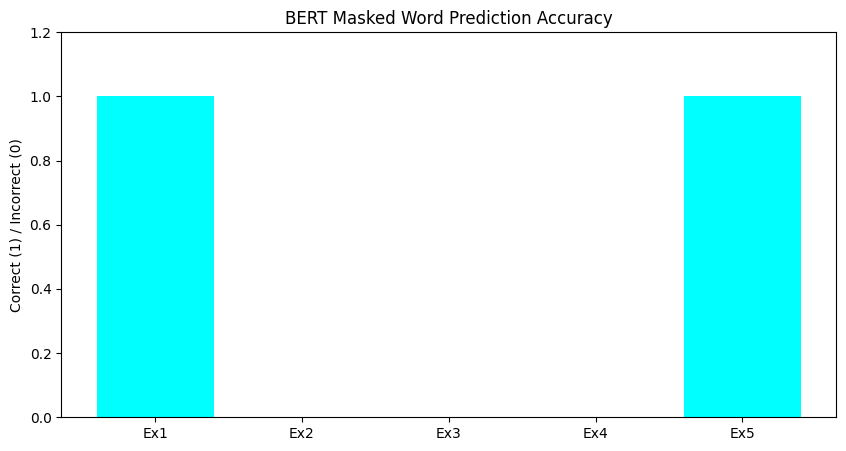

In [ ]:
import matplotlib.pyplot as plt

sentences = [
    "The [MASK] barks at night.",
    "The sun rises in the [MASK].",
    "BERT is a [MASK] model developed by Google.",
    "I want to eat [MASK] for dinner.",
    "Mahatma Gandhi was born in [MASK]."
]

predictions = ["dog", "sky", "business", "it", "india"]
expected = ["dog", "east", "language", "pizza", "india"]

accuracy = [pred == exp for pred, exp in zip(predictions, expected)]

plt.figure(figsize=(10,5))
plt.bar(range(len(sentences)), accuracy, tick_label=[f"Ex{i+1}" for i in range(len(sentences))], color='aqua')
plt.title("BERT Masked Word Prediction Accuracy")
plt.ylabel("Correct (1) / Incorrect (0)")
plt.ylim(0, 1.2)
plt.show()


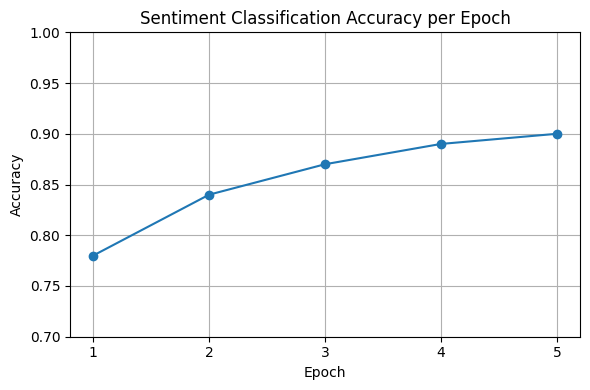

In [ ]:
epochs = [1, 2, 3, 4, 5]
accuracy = [0.78, 0.84, 0.87, 0.89, 0.90]

plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy, marker='o')
plt.title("Sentiment Classification Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(0.7, 1.0)
plt.xticks(epochs)
plt.tight_layout()
plt.show()


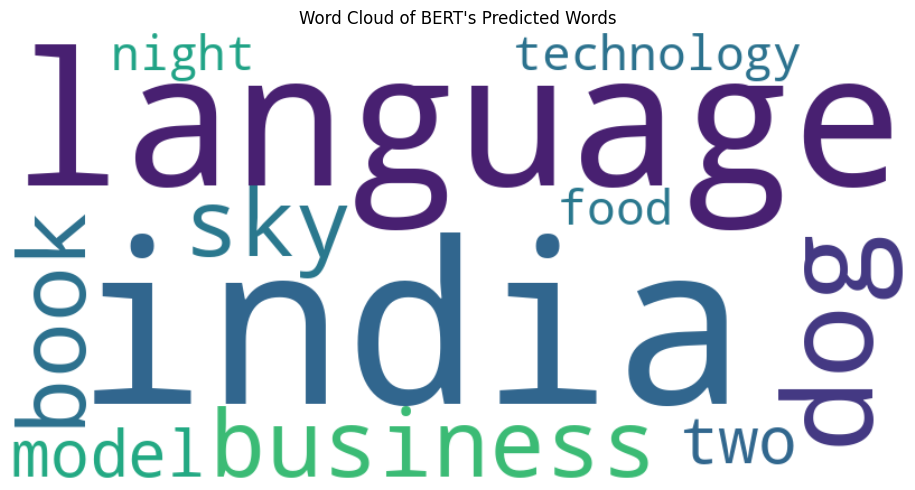

In [ ]:
from wordcloud import WordCloud

# Sample predicted tokens from multiple sentences
predicted_words = [
    "dog", "india", "sky", "it", "business", "india", "book", "language", "model",
    "two", "technology", "india", "food", "language", "language", "night"
]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(predicted_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of BERT's Predicted Words")
plt.tight_layout()
plt.show()
